## Supervised Learning Project on Patient Classification
#### Thanks for all the learnings, key learnings include:

1. Different models perform well at different instances - e.g. knn and logistic
2. Impact of sead values and hyper parameter tuning on accuracies and results
3. Results may differ for 2 class Vs 3 class
4. Good naming convention, comments and other coding practices makes life easier later
5. Effective EDA can help get half the job done

In [159]:
# Data Description:  
# The data consists of Biomechanical features which are to be used to classify  patients according to their labels  Domain:  
# Healthcare/Medicine  Context: 
# The data have been organized in two different but related classification  tasks.  3C_weka.csv (file with three class labels)  The first task consists in classifying patients as belonging to one out of  three categories: Normal (100 patients), Disk Hernia (60 patients) or  Spondylolisthesis (150 patients).  2C_weka.csv (file with two class labels)  For the second task, the categories Disk Hernia and Spondylolisthesis were  merged into a single category labelled as 'abnormal'. Thus, the second task  consists in classifying patients as belonging to one out of two categories:  Normal (100 patients) or Abnormal (210 patients).  Attribute Information: 
# Each patient is represented in the data set by six biomechanical attributes  derived from the shape and orientation of the pelvis and lumbar spine  (each one is a column):  ● pelvic incidence  ● pelvic tilt  ● lumbar lordosis angle  ● sacral slope  ● pelvic radius  ● grade of spondylolisthesis  
# Learning Outcomes:   ● Exploratory Data Analysis  ● Application of Supervised Learning algorithm    
# Objective:  Demonstrate the ability to fetch, process and leverage data to generate  useful predictions by training Supervised Learning algorithms.

In [160]:
# 1. Import the necessary libraries (1 mark) 

# Importing libraries
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [161]:
# 2. Import data 2C_weka.csv for 2 Class Classification. (1 mark)  

Two_Class_data=pd.read_csv("D:/Dropbox (eClerx Services Ltd.)/Rajneet.Gulair/Desktop/04 eClerx General/Great Learning/03 Supervised Learning/Assignments/2C_weka.csv")


In [162]:
# 3. Explore the dataset and mention the insights (4 marks)

Two_Class_dataframe = pd.DataFrame (Two_Class_data)

# Read a few rows
Two_Class_dataframe.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [163]:
# Shape, datatype, missing values and 5 point summary : Fileds mostly float, except class

# Two_Class_dataframe.shape
# (310, 7)

# Two_Class_dataframe.dtypes
# pelvic_incidence            float64
# pelvic_tilt numeric         float64
# lumbar_lordosis_angle       float64
# sacral_slope                float64
# pelvic_radius               float64
# degree_spondylolisthesis    float64
# class                        object
# dtype: object

# Two_Class_dataframe.isna().any().any()
# False
# No missing entries
 
# 5 point summary of numerical attributes
Two_Class_dataframe.describe()


# All columns except degree_spondylilisthesis normally distributed since the mean and median are very close. 
# This is also seen in below distribution graphs

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


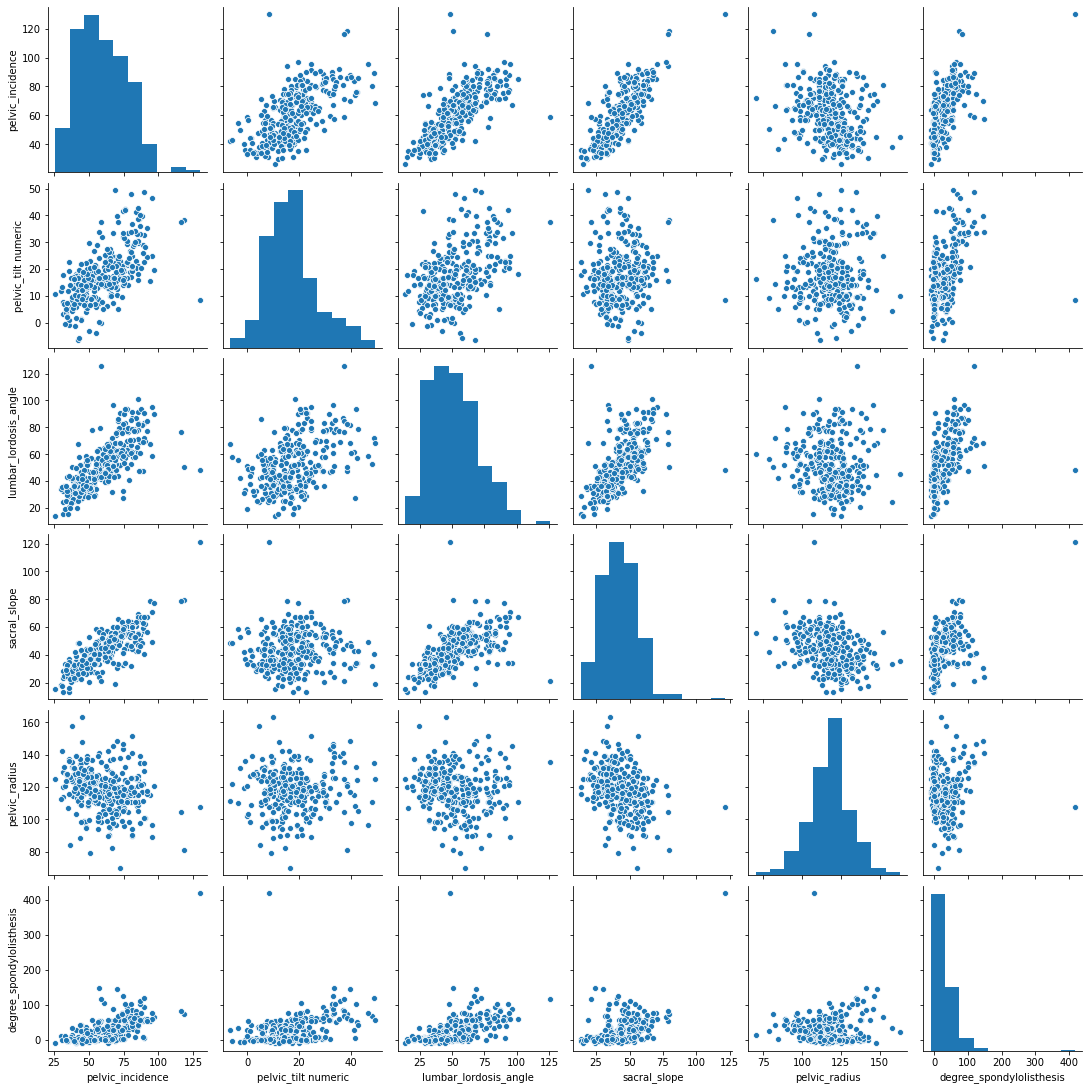

In [166]:
sns.pairplot(Two_Class_dataframe)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


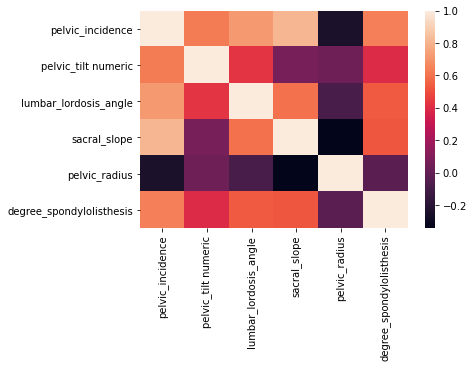

In [167]:
sns.heatmap(Two_Class_dataframe.corr())
Two_Class_dataframe.corr()

## Findings for question 3
 
MISSING DATA: 
 No missing entries
    
NORMALITY:
 All columns except degree_spondylilisthesis normally distributed since the mean and median are very close

CORRELATION:
 High correlation of pelvic incidence with most variables except pelvic radius (>60%)
 lumbar_lordosis_angle, sacral_slope, degree_spondylolisthesis are also correlated (>50%)

Text(0.5, 1.0, 'pelvic_incidence')

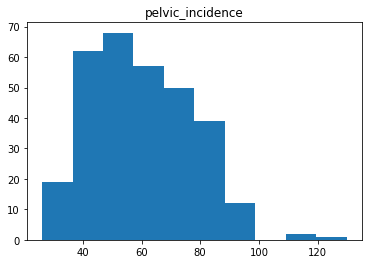

In [60]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["pelvic_incidence"])
plt.title('pelvic_incidence')

Text(0.5, 1.0, 'pelvic_tilt numeric')

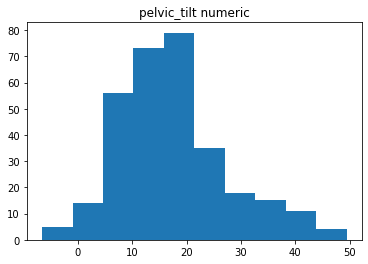

In [61]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["pelvic_tilt numeric"])
plt.title('pelvic_tilt numeric')

Text(0.5, 1.0, 'lumbar_lordosis_angle')

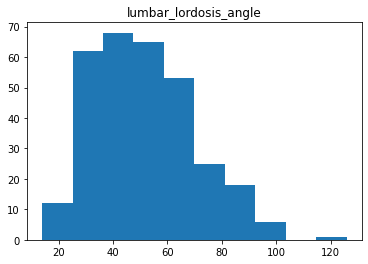

In [62]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["lumbar_lordosis_angle"])
plt.title('lumbar_lordosis_angle')

Text(0.5, 1.0, 'sacral_slope')

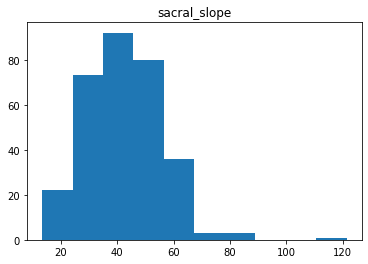

In [63]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["sacral_slope"])
plt.title('sacral_slope')

Text(0.5, 1.0, 'pelvic_radius')

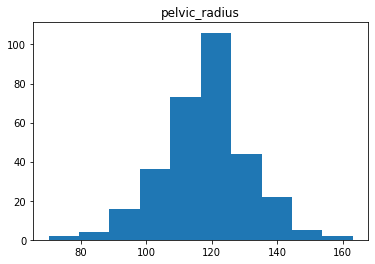

In [64]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["pelvic_radius"])
plt.title('pelvic_radius')

Text(0.5, 1.0, 'degree_spondylolisthesis')

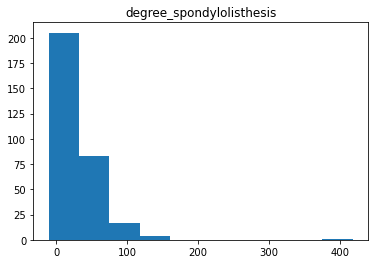

In [65]:
# Distribution of each of the columns.
plt.hist(Two_Class_dataframe["degree_spondylolisthesis"])
plt.title('degree_spondylolisthesis')

In [66]:
# 4. Encode the Class variable to integer (2 marks) 
encoder = LabelEncoder()
Two_Class_dataframe['class'] = encoder.fit_transform(Two_Class_dataframe['class'])
Two_Class_dataframe.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


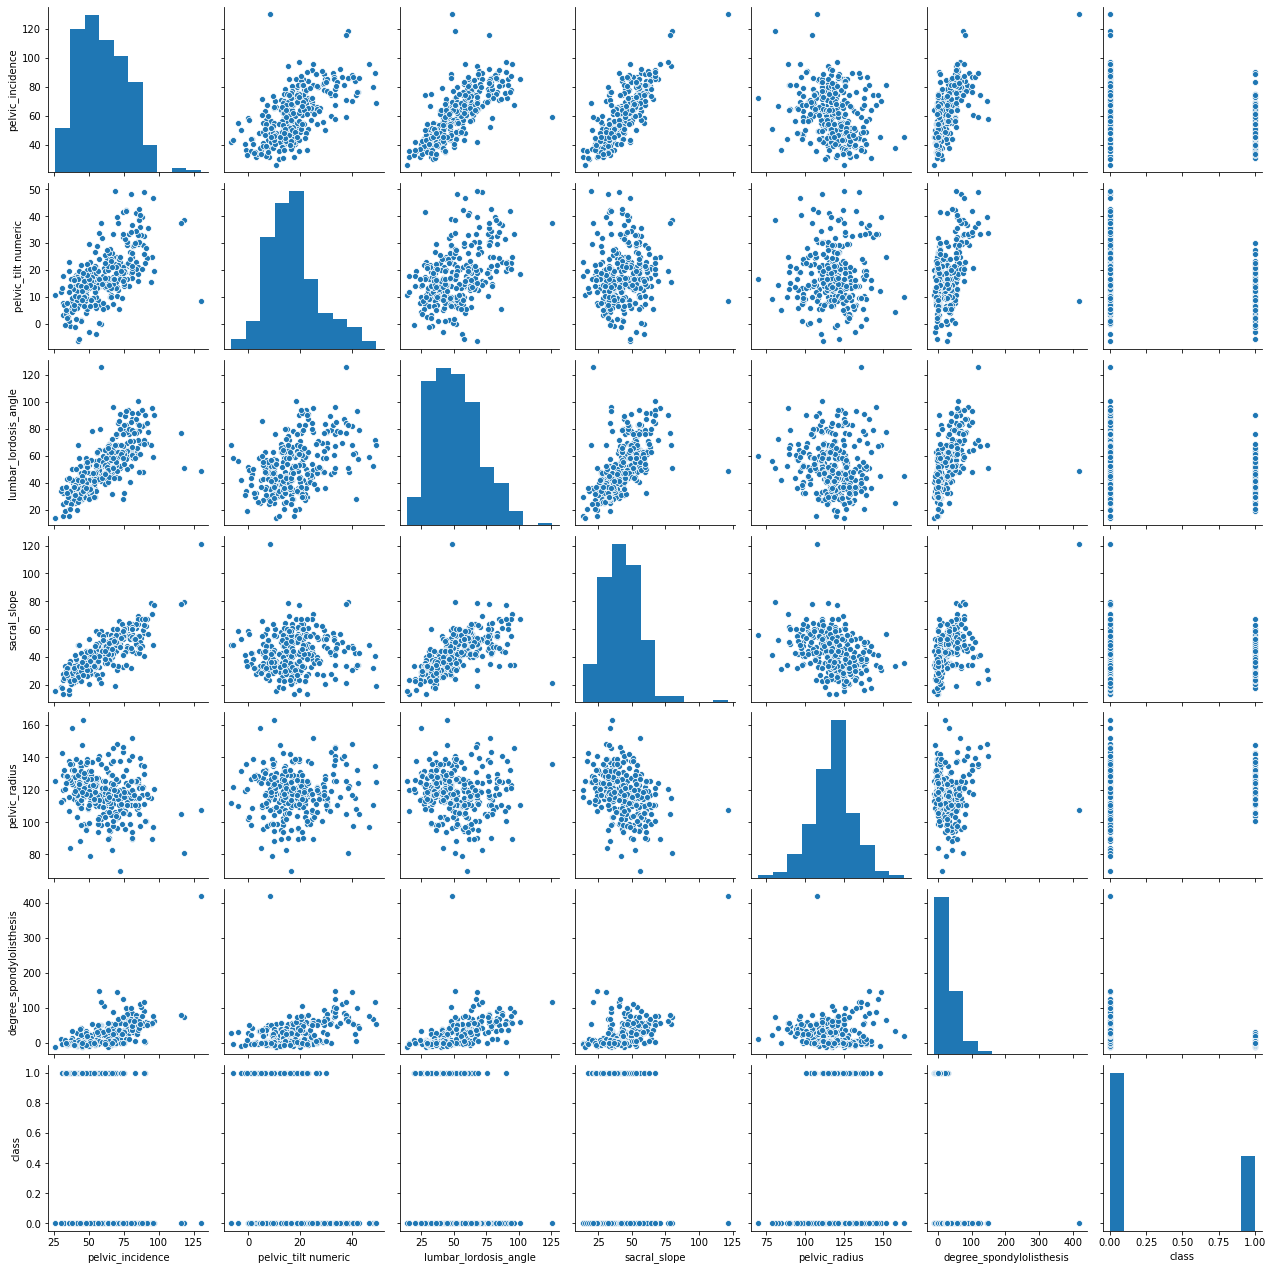

In [67]:
sns.pairplot(Two_Class_dataframe)

In [169]:
# 5. Create the X(Feature-set) and Y(Target-set) sets for your Data. (2  marks)
# Changing variable names from X and Y to X2 and y2 in order to keep similar naking convention for 2class and 3class exercises

# Target value is class
y2 = Two_Class_dataframe[['class']]

# Feature set is remaining features
X2 = Two_Class_dataframe.drop('class', axis = 1)

y2.head()
X2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [170]:
# 6. Normalize your Data (X) to get values between 0 to 1 (2 marks)  

scaler = MinMaxScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2))
X2.head(10)

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


In [171]:
# 7. Split the data as a train and test with a ratio of 70:30. (1 marks) 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2)

# Show the results of the split
print(X2_train.shape,X2_test.shape, y2_train.shape, y2_test.shape)

(217, 6) (93, 6) (217, 1) (93, 1)


In [172]:
# 8. Train k-NN algorithm and optionally one other classification  algorithm of your choice using the train data and measure their  accuracy scores on the test data (5 marks)  

knn_2class = KNeighborsClassifier(n_neighbors=20)

# Train the model using the training sets
knn_2class.fit(X2_train, y2_train.values.ravel())

# Make predictions using the testing set
y2_pred = knn_2class.predict(X2_test)

print("The train and test accuracies are {}% and {}%".format(round(knn_2class.score(X2_train, y2_train)*100,2), round(knn_2class.score(X2_test, y2_test)*100,2)))

The train and test accuracies are 83.87% and 76.34%


In [173]:
log_2class = linear_model.LogisticRegression()

# Train the model using the training sets
log_2class.fit(X2_train, y2_train.values.ravel())

# Make predictions using the testing set
y2_pred = log_2class.predict(X2_test)

print("The train and test accuracies are {}% and {}%".format(round(log_2class.score(X2_train, y2_train)*100,2), round(log_2class.score(X2_test, y2_test)*100,2)))

The train and test accuracies are 75.12% and 76.34%


In [188]:
# 9. What is the best K value for your classification? Find at which k value  you get the best score (2 marks) 
# Trying iterating through k value
highest_acc = 0
final_k=1
for kn in range(1,100):
    knn_2class = KNeighborsClassifier(n_neighbors=kn)

    # Train the model using the training sets
    knn_2class.fit(X2_train, y2_train.values.ravel())

    # Make predictions using the testing set
    y2_pred = knn_2class.predict(X2_test)
  
    if(knn_2class.score(X2_test, y2_test) >= highest_acc):
        highest_acc=knn_2class.score(X2_test, y2_test)
        final_k=kn
print(final_k,round(highest_acc*100,2))

# Best k at 27 groups with 81.72% accuracy

27 81.72


### KEY LEARNINGS

1. Selecting knn with 27 groups basis performance
2. No model always performs well

# SECTION 2 : 3 Class

In [ ]:
# 1. Import the necessary libraries (1 mark) 

# Importing libraries
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [133]:
# 2. Import data 3C_weka.csv for 3 Class Classification. (1 mark)  

Three_Class_data=pd.read_csv("D:/Dropbox (eClerx Services Ltd.)/Rajneet.Gulair/Desktop/04 eClerx General/Great Learning/03 Supervised Learning/Assignments/3C_weka.csv")
Three_Class_dataframe = pd.DataFrame (Three_Class_data)

In [135]:
# 3. Explore the dataset and mention the insights (4 marks)

Three_Class_dataframe = pd.DataFrame (Three_Class_data)

# Read a few rows
Three_Class_dataframe.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [136]:
# Shape, datatype, missing values and 5 point summary : Fileds mostly float, except class

# Three_Class_dataframe.shape
# (310, 7)

# Three_Class_dataframe.dtypes
# pelvic_incidence            float64
# pelvic_tilt numeric         float64
# lumbar_lordosis_angle       float64
# sacral_slope                float64
# pelvic_radius               float64
# degree_spondylolisthesis    float64
# class                        object
# dtype: object

# Three_Class_dataframe.isna().any().any()
# False
# No missing entries
 
# 5 point summary of numerical attributes
Three_Class_dataframe.describe()


# All columns except degree_spondylilisthesis normally distributed since the mean and median are very close. 
# This is also seen in below distribution graphs

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


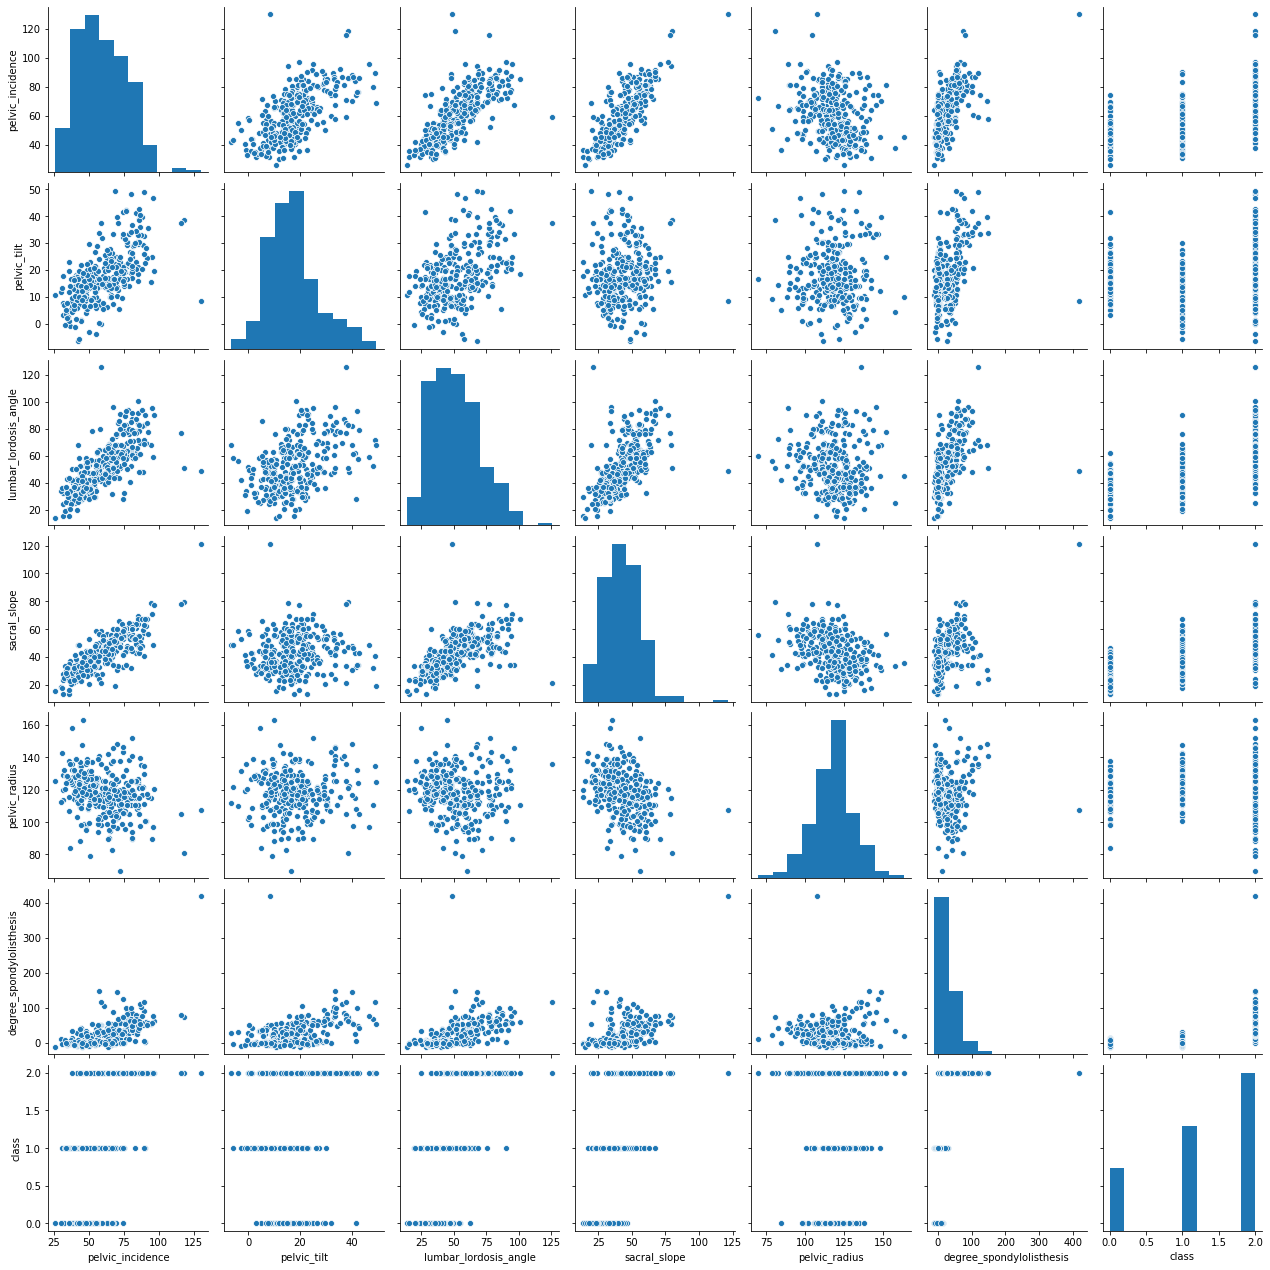

In [142]:
sns.pairplot(Three_Class_dataframe)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.588541
class,0.590025,0.205158,0.636490,0.604681,-0.133424,0.588541,1.000000


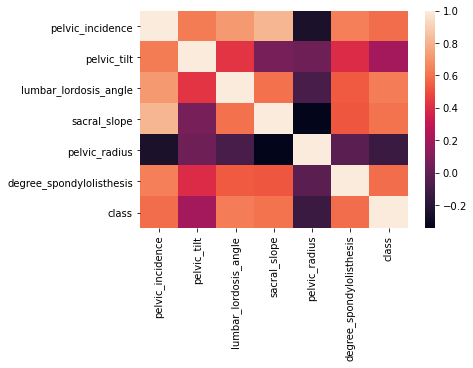

In [143]:
sns.heatmap(Three_Class_dataframe.corr())
Three_Class_dataframe.corr()

## Findings for question 3
 
MISSING DATA: 
 No missing entries
    
NORMALITY:
 All columns except degree_spondylilisthesis normally distributed since the mean and median are very close

CORRELATION:
 High correlation of pelvic incidence with most variables except pelvic radius (>60%)
 lumbar_lordosis_angle, sacral_slope, degree_spondylolisthesis are also correlated (>50%)

In [148]:
# 4. Encode the Class variable to integer (2 marks) 
encoder = LabelEncoder()
Three_Class_dataframe['class'] = encoder.fit_transform(Three_Class_dataframe['class'])
Three_Class_dataframe.head(100)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,2
96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,2
97,74.720746,19.756942,82.735360,54.963804,109.356594,33.306067,2
98,77.655119,22.432950,93.892779,55.222169,123.055707,61.211187,2


In [149]:
# 5. Create the X(Feature-set) and Y(Target-set) sets for your Data. (2  marks)
# Changing variable names from X and Y to X2 and y3 in order to keep similar naking convention for 2class and 3class exercises

# Target value is class
y3 = Three_Class_dataframe[['class']]

# Feature set is remaining features
X3 = Two_Class_dataframe.drop('class', axis = 1)

y3.head()
X3.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [150]:
# 6. Normalize your Data (X) to get values between 0 to 1 (2 marks)  

scaler = MinMaxScaler()
X3 = pd.DataFrame(scaler.fit_transform(X2))
X3.head(10)

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


In [189]:
# 7. Split the data as a train and test with a ratio of 70:30. (1 marks) 

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=2)

# Show the results of the split
print(X3_train.shape,X3_test.shape, y3_train.shape, y3_test.shape)

(217, 6) (93, 6) (217, 1) (93, 1)


In [190]:
# 8. Train k-NN algorithm and optionally one other classification  algorithm of your choice using the train data and measure their  accuracy scores on the test data (5 marks)  

knn_3class = KNeighborsClassifier(n_neighbors=30)

# Train the model using the training sets
knn_3class.fit(X3_train, y3_train.values.ravel())

# Make predictions using the testing set
y3_pred = knn_3class.predict(X3_test)

print("The train and test accuracies are {}% and {}%".format(round(knn_3class.score(X3_train, y3_train)*100,2), round(knn_3class.score(X3_test, y3_test)*100,2)))

The train and test accuracies are 79.72% and 76.34%


In [191]:
log_3class = linear_model.LogisticRegression()

# Train the model using the training sets
log_3class.fit(X3_train, y3_train.values.ravel())

# Make predictions using the testing set
y3_pred = log_3class.predict(X3_test)

print("The train and test accuracies are {}% and {}%".format(round(log_3class.score(X3_train, y3_train)*100,2), round(log_3class.score(X3_test, y3_test)*100,2)))

The train and test accuracies are 76.5% and 69.89%


In [193]:
# 9. What is the best K value for your classification? Find at which k value  you get the best score (2 marks) 
# Trying iterating through k value
highest_acc = 0
final_kn=1
for kn in range(1,100):
    knn_3class = KNeighborsClassifier(n_neighbors=kn)

    # Train the model using the training sets
    knn_3class.fit(X3_train, y3_train.values.ravel())

    # Make predictions using the testing set
    y3_pred = knn_2class.predict(X3_test)
  
    if(knn_3class.score(X3_test, y3_test) >= highest_acc):
        highest_acc=knn_3class.score(X3_test, y3_test)
        final_k=kn
        
print(final_k,round(highest_acc*100,2))

# Best k at 7 groups with 78.49% accuarcy

7 78.49


# KEY LEARNINGS

1. Value of k can differ basis sead value. It can be very different for 2 class and 3 class
2. Hyper parameter tuning is very important

# Thank You!